In [5]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, Input, GaussianNoise
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


In [6]:
train = loadmat('C://Personal//Datasets//Getting started with tensorflow 2//train_32x32.mat')
test = loadmat('C://Personal//Datasets//Getting started with tensorflow 2//test_32x32.mat')

In [7]:
train_X=train['X']
train_y=train['y']

test_X=test['X']
test_y=test['y']

In [8]:
train_X

array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

C:\Users\Salehin\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


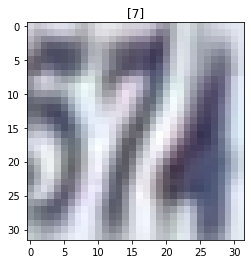

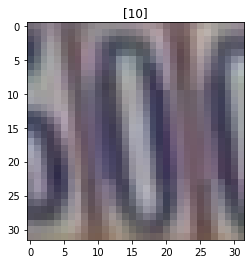

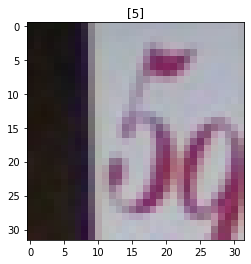

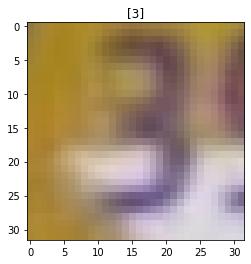

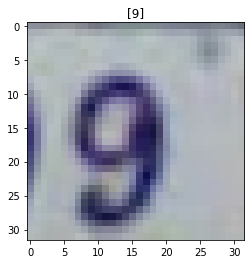

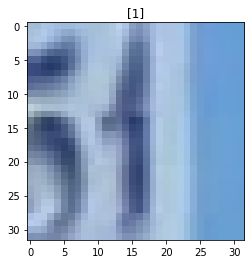

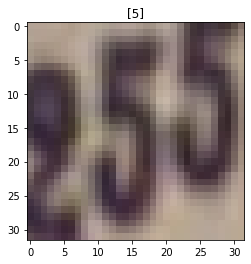

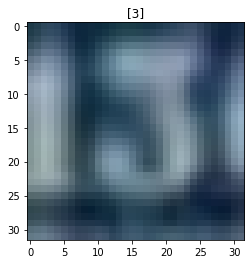

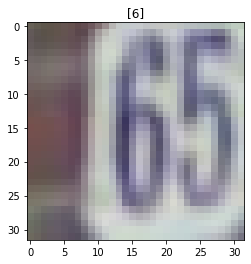

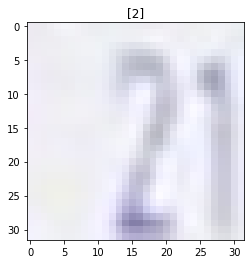

In [9]:
n=10
image_num=[]
for i in range(n):
    image_num.append(random.randint(0, train_X.shape[3]))
    
for i in range(len(image_num)):
    plt.imshow(train_X[:,:,:,image_num[i]])
    plt.title(train_y[image_num[i],:])
    plt.show()

In [10]:
train_X.shape

(32, 32, 3, 73257)

In [11]:
#COnvert to grayscale image
train_X=np.array(train['X'])
train_y=np.array(train['y'])

test_X=np.array(test['X'])
test_y=np.array(test['y'])

train_X_gray=np.mean(train_X,axis=2)
test_X_gray=np.mean(test_X,axis=2)


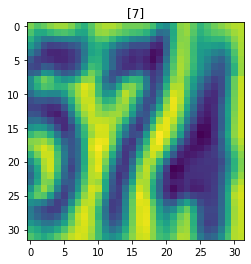

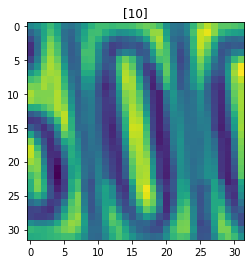

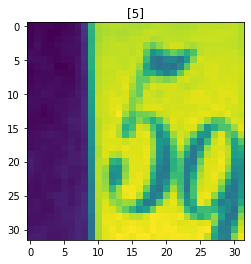

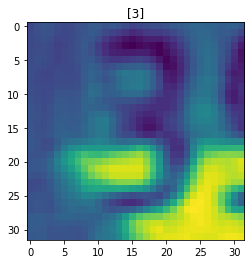

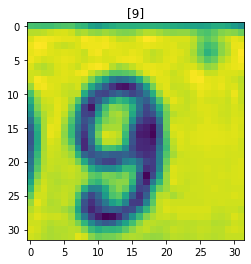

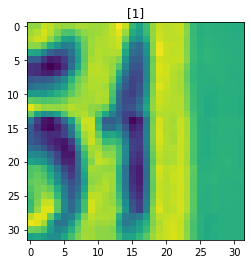

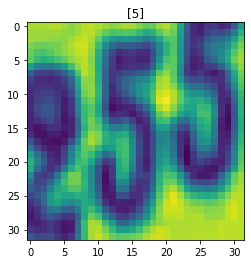

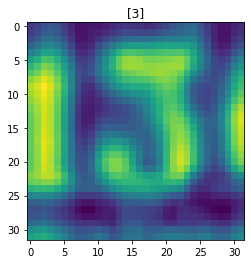

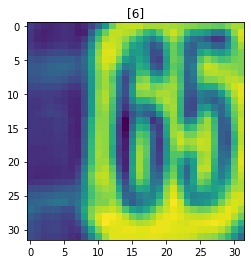

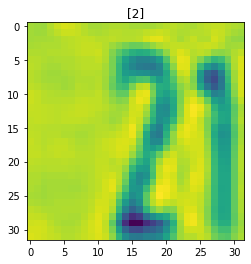

In [12]:
for i in range(len(image_num)):
    plt.imshow(train_X_gray[:,:,image_num[i]])
    plt.title(train_y[image_num[i],:])
    plt.show()
    

In [13]:
#check_shape
train_X_gray.shape

(32, 32, 73257)

In [14]:
#The number of examples column should be the 1st one, that's what the neural network expects. so I am doing that now
train_X_changed=np.zeros((73257,32,32))
for i in range(train_X_gray.shape[2]):
    train_X_changed[i,:,:]=train_X_gray[:,:,i]
    

In [15]:
#Now the dimension
train_X_changed.shape

(73257, 32, 32)

In [16]:
test_X_changed=np.zeros((26032,32,32))
for i in range(test_X_gray.shape[2]):
    test_X_changed[i,:,:]=test_X_gray[:,:,i]

In [17]:
test_X_changed.shape

(26032, 32, 32)

In [18]:
#cnn expects 3 dimensional input. so making an extra dimension for image
train_X_cnn=train_X_changed[...,np.newaxis]
test_X_cnn=test_X_changed[...,np.newaxis]

In [19]:
train_X_cnn.shape

(73257, 32, 32, 1)

In [20]:
#convert labels to categorical variables
y_example=to_categorical(train_y)
y_example

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
y_test_example=to_categorical(test_y)

In [22]:
#Normalize
train_X_changed=train_X_changed/255
test_X_changed=test_X_changed/255

In [23]:
train_X_cnn=train_X_cnn/255
test_X_cnn=test_X_cnn/255

In [24]:
#BUild a Neural Network classfier
def get_model():
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model=Sequential([Flatten(input_shape=(32,32)),
                      Dense(512,activation='relu'),
                      Dense(256,activation='relu'),
                      Dense(11,activation='softmax')
                     ])
    return model

In [25]:
model=get_model()


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 11)                2827      
Total params: 658,955
Trainable params: 658,955
Non-trainable params: 0
_________________________________________________________________


In [27]:
es=EarlyStopping(monitor="val_loss",patience=3)
checkpoint=ModelCheckpoint('nncheckpoint/checkpoint_model.{epoch}',save_best_only=True)

In [28]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [29]:
history=model.fit(train_X_changed,y_example,validation_split=0.15,epochs=20,batch_size=64,callbacks=[es,checkpoint])

Epoch 1/20
973/973 [==============================] - 9s 7ms/step - loss: 2.0619 - accuracy: 0.2626 - val_loss: 1.6781 - val_accuracy: 0.4060
INFO:tensorflow:Assets written to: nncheckpoint\checkpoint_model.1\assets
Epoch 2/20
973/973 [==============================] - 8s 8ms/step - loss: 1.4435 - accuracy: 0.5170 - val_loss: 1.2609 - val_accuracy: 0.6090
INFO:tensorflow:Assets written to: nncheckpoint\checkpoint_model.2\assets
Epoch 3/20
973/973 [==============================] - 8s 8ms/step - loss: 1.2088 - accuracy: 0.6162 - val_loss: 1.1298 - val_accuracy: 0.6476
INFO:tensorflow:Assets written to: nncheckpoint\checkpoint_model.3\assets
Epoch 4/20
973/973 [==============================] - 9s 9ms/step - loss: 1.0937 - accuracy: 0.6603 - val_loss: 1.0948 - val_accuracy: 0.6609
INFO:tensorflow:Assets written to: nncheckpoint\checkpoint_model.4\assets
Epoch 5/20
973/973 [==============================] - 8s 8ms/step - loss: 1.0225 - accuracy: 0.6847 - val_loss: 0.9691 - val_accuracy: 0

In [30]:
model.evaluate(test_X_changed,y_test_example)

814/814 [==============================] - 2s 2ms/step - loss: 0.9182 - accuracy: 0.7306


[0.9181862473487854, 0.7305623888969421]

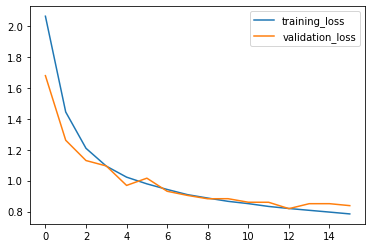

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_loss','validation_loss'])

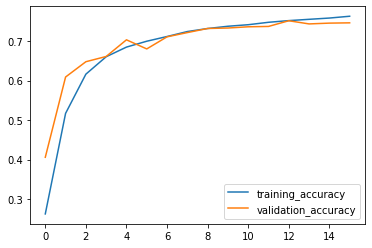

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','validation_accuracy'])

In [33]:
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D,Dropout,BatchNormalization

def get_model(rate):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model=Sequential([Conv2D(8, kernel_size=(3,3),padding='same', activation='relu',input_shape=(32,32,1)),BatchNormalization(),Dropout(rate),MaxPooling2D(2,2),
                      Dropout(rate),Conv2D(8, kernel_size=(3,3),padding='same', activation='relu'),BatchNormalization(),Dropout(rate),Flatten(),
                  Dense(64,activation='relu'), BatchNormalization(),Dropout(rate),Dense(64,activation='relu'),BatchNormalization(),Dropout(rate),Dense(11, activation="softmax")])
    return model

In [34]:
train_X.shape

(32, 32, 3, 73257)

In [35]:
get_conv_model=get_model(0.05)

In [36]:
get_conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         80        
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 8)         32        
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         584       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 8)        

In [37]:
es=EarlyStopping(monitor="val_loss",patience=3)
checkpoint=ModelCheckpoint('cnncheckpoint/checkpoint_model.{epoch}',save_weights_only=False,save_best_only=True)

In [38]:
get_conv_model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [39]:
history2=get_conv_model.fit(train_X_cnn,y_example,validation_split=0.15,epochs=10,batch_size=64,callbacks=[es,checkpoint])

Epoch 1/10
973/973 [==============================] - 46s 46ms/step - loss: 1.1365 - accuracy: 0.6349 - val_loss: 0.5869 - val_accuracy: 0.8237
INFO:tensorflow:Assets written to: cnncheckpoint\checkpoint_model.1\assets
Epoch 2/10
973/973 [==============================] - 50s 51ms/step - loss: 0.5726 - accuracy: 0.8249 - val_loss: 0.5021 - val_accuracy: 0.8470
INFO:tensorflow:Assets written to: cnncheckpoint\checkpoint_model.2\assets
Epoch 3/10
973/973 [==============================] - 54s 56ms/step - loss: 0.4802 - accuracy: 0.8525 - val_loss: 0.4467 - val_accuracy: 0.8625
INFO:tensorflow:Assets written to: cnncheckpoint\checkpoint_model.3\assets
Epoch 4/10
973/973 [==============================] - 54s 55ms/step - loss: 0.4375 - accuracy: 0.8656 - val_loss: 0.5115 - val_accuracy: 0.8393
Epoch 5/10
973/973 [==============================] - 53s 54ms/step - loss: 0.4037 - accuracy: 0.8748 - val_loss: 0.4396 - val_accuracy: 0.8672
INFO:tensorflow:Assets written to: cnncheckpoint\checkp

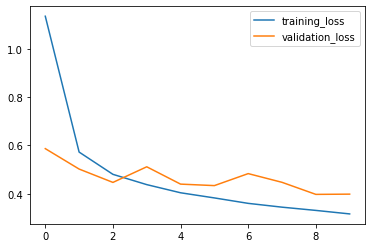

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['training_loss','validation_loss'])

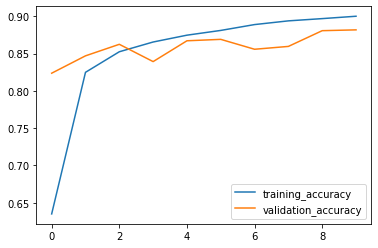

In [41]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['training_accuracy','validation_accuracy'])

In [42]:
get_conv_model.evaluate(test_X_cnn,y_test_example)

814/814 [==============================] - 5s 6ms/step - loss: 0.4423 - accuracy: 0.8678


[0.4423384368419647, 0.8677781224250793]

In [44]:
get_conv_model.load_weights(tf.train.latest_checkpoint('cnncheckpoint'))

AttributeError: 'NoneType' object has no attribute 'endswith'

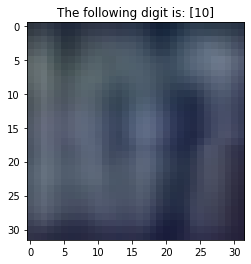

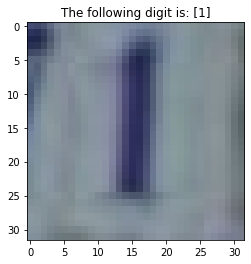

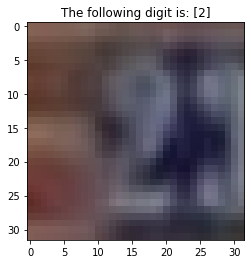

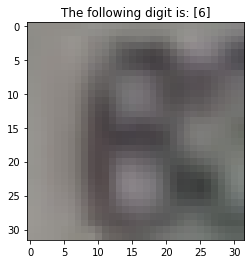

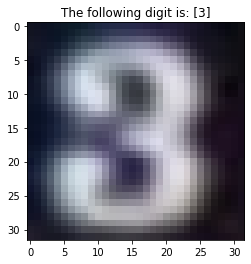

In [45]:
#randomly select 5 images and display their labels
n=5
image_num=[]
for i in range(n):
    image_num.append(random.randint(0, test_X.shape[3]))
    
for i in range(len(image_num)):
    plt.imshow(test_X[:,:,:,image_num[i]])
    plt.title('The following digit is: {}'.format(test_y[image_num[i],:]))
    plt.show()

In [46]:
predictions=get_conv_model.predict(test_X_cnn[image_num[0:5],:,:,:])

In [48]:
xaxis=[i for i in range(0,11)]
xaxis

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

cnn prediction for this image is 10


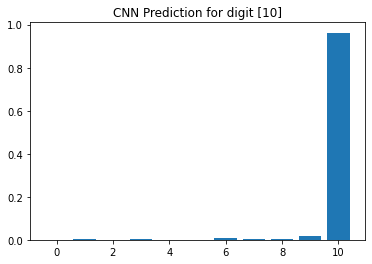

cnn prediction for this image is 1


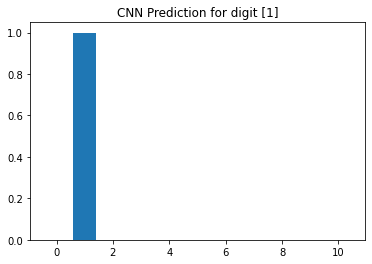

cnn prediction for this image is 2


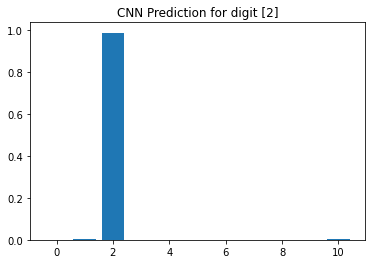

cnn prediction for this image is 6


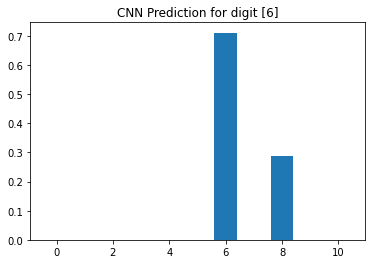

cnn prediction for this image is 3


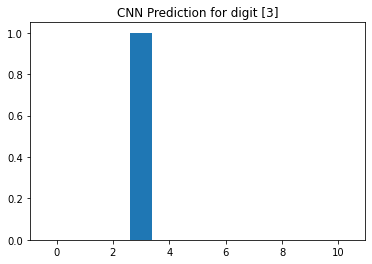

In [49]:
for i in range(len(predictions)):
    plt.bar(xaxis,predictions[i])
    plt.title(label="CNN Prediction for digit {}".format(test_y[image_num[i],:]))
    print("cnn prediction for this image is {}".format(np.argmax(predictions[i])))
    plt.show()

In [50]:
#Let's check the predictions with neural network

predictions=model.predict(test_X_changed[image_num[0:5],:,:])

Neural Network prediction for this image is 10


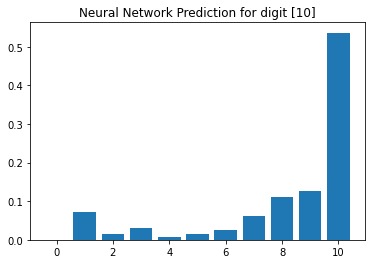

Neural Network prediction for this image is 1


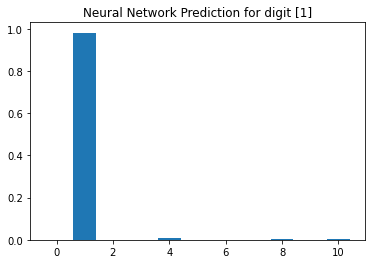

Neural Network prediction for this image is 2


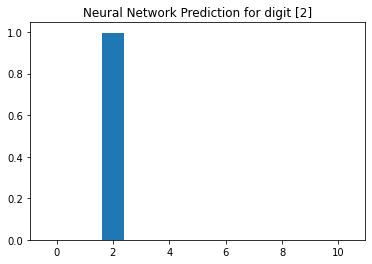

Neural Network prediction for this image is 6


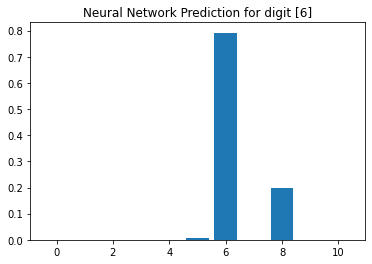

Neural Network prediction for this image is 3


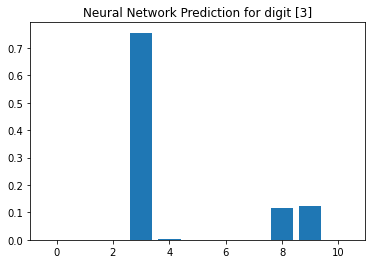

In [51]:
for i in range(len(predictions)):
    plt.bar(xaxis,predictions[i])
    plt.title(label="Neural Network Prediction for digit {}".format(test_y[image_num[i],:]))
    print("Neural Network prediction for this image is {}".format(np.argmax(predictions[i])))
    plt.show()

In [52]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
